Let's start with geometric mean options. Let us define geometric mean as follow
$$
G(T) = \exp\left( \dfrac{1}{T} \int_{0}^T \ln S_u du  \right) 
$$

Suppose $S_t$ follows BS model, e.i.
$$
\dfrac{dS_t}{S_t} = r dt + \sigma dW_t
$$
Let $X_t = \log S_t$, then using Ito formula we have:
$$
dX_t = \left(r - \dfrac{\sigma^2}{2}\right)dt + \sigma dW_t
$$
Thus:
$$
X_u = X_t + \left(r - \dfrac{\sigma^2}{2}\right)(u - t) + \sigma (W_u - W_t)
$$where $u > t$.

So 
$$
\int_0^T X_u du = \int_0^t X_u du + \int_t^{T} X_u du = 
I_t + (T-t) X_t + \left(r - \dfrac{\sigma^2}{2}\right) \int_t^{T} (u-t) du + \sigma \int_t^T (W_u - W_t) du
$$
So
$$
I_T = \int_0^T X_u du = I_t + (T-t) X_t + \left(r - \dfrac{\sigma^2}{2}\right) \dfrac{\left(T-t\right)^2}{2}
+ \sigma \int_0^{T-t} W_u du
$$

Let us denote $Y_s = \int_0^{s} W_u du$. We see that all the randomness in $I_T$ comes from $Y_{T_t}$. Using integration by parts, we can derive the following formula for $Y_s$:

$$
Y_s = \int_0^{s} W_u du = s W_s - \int_0^s u dW_u = \int_0^s \left( s - u \right) dW_u 
$$
So  
$$
\mathbb{E} Y_s = 0
$$
$$
Var(Y_s) = \int_0^s \left(s-u\right)^2 du = \dfrac{s^3}{3}
$$

We see that $I_T$ follows the normal distribution with mean $I_t + (T-t) X_t + \left(r - \dfrac{\sigma^2}{2}\right) \dfrac{\left(T-t\right)^2}{2}$ and variance:
$$
Var(I_T) = \sigma^2 Var\left(Y_{T-t}\right) = \sigma^2\dfrac{(T-t)^3}{3}
$$

So, $G_T$ conditioning on $F_t$ has lognormal distribution with mean
$$
\mu_t = \dfrac{1}{T} \int_0^t \ln S_u du + \dfrac{T-t}{T} \ln S_t + \left( r - \dfrac{\sigma^2}{2}\right) \dfrac{\left(T-t\right)^2}{2T}
$$and variance
$$
v_t^2 = \sigma^2\dfrac{(T-t)^3}{3T^2}
$$So
$$
G_T = \exp\left( \mu_t + v_t \xi\right)
$$where $\xi \sim N(0, 1)$

Now we can calculate the price of an put option:

$$
C_t(S_t, I_t, t) = e^{-r(T-t)} \mathbb{E}^{F_t} \left( G_T - K \right)^+
$$
So $G_T > K \leftrightarrow \xi \geq \dfrac{\log K - \mu_t}{v_t} = -d_2$
$$
\mathbb{E}^{F_t} K I_{G_T > K} = K \mathbb{P} \left( \xi \geq \dfrac{\log K - \mu_t}{v_t} \right)
= K \Phi\left( d_2 \right)
$$
The first integral is more complicated:
$$
\mathbb{E}^{F_t} G_T I_{G_T > K} = \dfrac{1}{\sqrt{2\pi}}\int_{-d_2}^{\infty} e^{-z^2/2} e^{\mu_t + zv_t}dz
= e^{\mu_t + v_t^2 / 2} \dfrac{1}{\sqrt{2\pi}} \int_{-d_2}^{\infty} e^{-(z-v_t)^2/2}
= e^{\mu_t + v_t^2 / 2} \Phi(d_1)
$$where $d_2 = \dfrac{\mu_t - \log K}{v_t}, d_1 = d_2 + v_t$

# Arithmetic mean option

Let $f(x)$ be a convex function, so we have Jenson inequality:
$$
f\left(\mathbb{E}\xi\right) \leq \mathbb{E} f(\xi)
$$If the function is concave, we have the inverse inequality.
Consider a measure $\mu(dt) = \dfrac{dt}{T}$ on interval $t\in[0, T]$. This is probability measure, so since $\log x$ is a concave funciton we have:
$$
\log \left( \dfrac{1}{T} \int_0^T S_u du \right) \geq \dfrac{1}{T} \int_0^T \log S_u du
$$
Taking exponent of both sides we have:
$$
\dfrac{1}{T} \int_0^T S_u du \geq \exp\left( \dfrac{1}{T} \int_0^T \log S_u du \right) = G_T
$$So the arighmetic mean $A_T = \dfrac{1}{T} \int_0^T S_u du$ is greater then geometric mean $G_T$. Since a payoff function of a call option is nondecreasing with $A_T$, we have:
$$
(A_T - K)^+ \geq (G_T - K)^+
$$Actually, the same holds for any nondecreasing payoff function $\phi$.

Thus, the price of an geometric mean option is a lower bound for an arithmetic mean option.

Another technique is a conditioning on the Geometric Mean:

$$
\mathbb{E} (A_T - K)^+ = \mathbb{E} \left[ (A_T - K)^+ | G_T \right]
= \int_0^{\infty}  \left[ (A_T - K)^+ | G_T = x\right] \phi(x) dx
= \int_0^{K}  \left[ (A_T - K)^+ | G_T = x\right] \phi(x) dx + 
\int_K^{\infty}  \left[ (A_T - K) | G_T = x\right] \phi(x) dx = C_1 + C_2
$$

In the second integral we noted that since $A_T \geq G_T$, then if $G_T \geq K$ then $A_T \geq K$ and $(A_T - K)^+=A_T-K$. The second integral $C_2$ can be computed analiticaly and we will do it later. As for the first integral, it can be approximated using moment matching technique. We can match first two moment of the variable $A_T$ given that $G_T=x$ to lognormal distribution and calculate the expectation under the integral.

To do this we need to find conditional distribution of $S_u$ and $G_T$, or of $X_u = \ln S_u$ and $I = \ln G_T$ given that $I = y = \ln x$.

Let $X_1, X_2, Y$ be the normal vector with parameters:
$$
\begin{cases}
&\mathbb{E} X_i = \mu_i, \mathbb{E} Y = \mu_y\\
&Var(X_i) = \sigma_i^2, \; Var(Y) = \sigma_y^2\\
&cov(X_1, X_2) = \rho \sigma_1 \sigma_2, \; cov(X_i, Y) = \rho_i \sigma_i\sigma_y
\end{cases}
$$

Then $X_1, X_2$ given $Y$ will have joint normal distribution too. In order to find parameters of this random vector let us introduce random variables $W_i$ such that:
$$
X_i = W_i + a_i Y
$$and $W_i \perp Y$. Since $W_i$ and $Y$ are joint normal, they are independend if and only if they are not correlated. So we have an equation for $a_i$:
$$
0 = cov (W_i, Y) = cov(X_i - a_i Y, Y) = \sigma_i \sigma_y \rho_i - a_i \sigma_y^2  
$$And
$$
a_i = \dfrac{\rho_i \sigma_i}{\sigma_y}
$$
Now we can calculate parameters:
$$
\mathbb{E} \left[X_i | Y\right] = \mathbb{E} W_i + a_i Y = \mu_x + a_i \left( Y - \mu_y \right)
$$
$$
cov(X_i, X_j | Y) = cov(W_i, W_j) = cov(X_i - a_iY, X_j - a_jY) = cov(X_i, X_j) + a_i a_j \sigma_y^2 - a_j cov(X_i, Y) - a_i cov(X_j, Y) =  \rho_{ij}\sigma_i\sigma_j + \rho_i \rho_j \sigma_i \sigma_j - 2\rho_j \sigma_j \rho_i\sigma_i = \rho_{ij}\sigma_i\sigma_j - \rho_i \rho_j \sigma_i \sigma_j
$$
Here $\rho_{ij} = \begin{cases}1, \text{ if } i = j\\\rho, \text{ if } i \neq j\end{cases}$

Finaly we have
$$
cov(X_i, X_i|Y) = \sigma_i^2\left(1 - \rho_i^2\right)
$$and
$$
cov(X_1, X_2|Y) = \sigma_1 \sigma_2 \left( \rho - \rho_1 \rho_2\right)
$$

Now let's compute moments of $A_T = \dfrac{1}{T} \int_0^T S_u du$ given that $G = x$. First let's find parameters of $Y = \ln G_T = \dfrac{1}{T} \int_0^T X_u du$
We have:
$$
\begin{aligned}
&T Y = \int_0^T X_u du = X_T T - \int_0^T u dX_u = \int_0^T (T - u) dX_u = 
\\=&
\left( r-\sigma^2/2\right) \int_0^T (T-u) du + \sigma \int_0^T (T-u) dW_u
=\left( r-\sigma^2/2\right)\dfrac{T^2}{2} + \sigma \int_0^T (T-u) dW_u
\end{aligned}
$$

$$
\mathbb{E} Y = X_0 + (r-\sigma^2/2) \dfrac{T}{2}
$$
$$
Var Y = \dfrac{\sigma^2}{T^2}  \int_0^T (T-u)^2 du = \dfrac{\sigma^2}{3 T^2} T^3 = T\sigma^2/3
$$

$$
cov(X_s, Y) = cov(X_s, \dfrac{1}{T}\int_0^T X_u du) = \dfrac{1}{T}\int_0^T cov(X_s, X_u) du
$$ We know that $cov(X_s, X_u) = \sigma^2 \min(s, u)$, so:
$$
cov(X_s, Y) = \dfrac{\sigma^2}{T} \int_0^s u du + \dfrac{\sigma^2}{T} \int_s^T s du = \dfrac{\sigma^2}{T}\left( s^2 / 2 + s(T-s) \right) = \dfrac{\sigma^2 s}{T} \left( T - s/2 \right) 
$$

Combining this with previous results, we have that for any $u < t$ $X_u, X_t$ given that $Y = y$ have joint normal distribution with parameters:
$$
\mathbb{E} \left[ X_u | Y = y \right] =\mu_u + \dfrac{cov(X_u, Y)}{\sigma_Y^2} \left( Y - \mathbb{E} Y\right) = \hat{\mu}_u
$$
$$
Var \left[ X_u | Y = y \right] = \sigma_u^2 (1 - \rho_u^2) = \hat{\sigma}_u^2
$$

And finaly
$$
cov(X_u, X_t | Y) = \sigma_u \sigma_v \left( \rho - \rho_u\rho_v \right) 
$$

Where
$$
\mu_u = \mathbb{E} X_u = (r-\sigma^2/2) u 
$$
$$
\sigma_u^2 = Var(X_u) = \sigma^2 u
$$
$$
\rho_u = \dfrac{cov(X_u, Y)}{\sigma_u \sigma_Y} = \sigma^2 u \dfrac{\left( T - u/2 \right)}{T \sigma \sqrt{u} \sigma \sqrt{T/3}} = u \dfrac{\left( T - u/2 \right)}{T  \sqrt{u} \sqrt{T/3}}
= \sqrt{\dfrac{3u}{T}} \left( 1 - \dfrac{u}{2T} \right)
$$

$$
\rho = \dfrac{cov(X_u, X_t)}{\sigma_u \sigma_t} = \dfrac{\min(u, t)}{\sqrt{ut}}
$$

Now we can calculate moments of $S_u$ given that $Y = y$:

$$
S_u = e^{X_u} \to \mathbb{E} S_u = \mathbb{E} e^{X_u} = e^{\hat{\mu}_u + \hat{\sigma}_u^2/2 }
$$

$$
\mathbb{E} S_u S_v = \mathbb{E} e^{X_u + X_v} = \mathbb{E} e^{\xi}
$$
where $\xi = X_u + X_v \sim N(\hat{\mu}_u + \hat{\mu}_v, \hat{\sigma}_u^2 + \hat{\sigma}_v^2 + 2cov(X_u, X_v | Y))$
Then:
$$
\mathbb{E} S_u S_v = e^{\hat{\mu}_u + \hat{\mu}_v + \hat{\sigma}_u^2/2 + \hat{\sigma}_v^2/2 + cov(X_u, X_v | Y)}
$$

Now:
$$
\mathbb{E}^Y \int_0^T S_u du = \int_0^T \mathbb{E}^Y S_u du = \int_0^T e^{\hat{\mu}_u + \hat{\sigma}_u^2/2 } du
$$

$$
\hat{\mu}_u = X_0 + (r-\sigma^2/2) u + \dfrac{3u}{T} \left( 1 - \dfrac{u}{2T}\right) \left(y - X_0 - (r-\sigma^2/2) \dfrac{T}{2}\right)
$$

$$
\hat{\sigma}_u^2 = \sigma_u^2 (1 - \rho_u^2) = \sigma^2 u \left( 1 - \dfrac{3u}{T}+ \dfrac{3u^2}{2T^2}\right)
$$

Another approach is conditioning on the stock price $S_T$ or, equivalently, to $X_T = \log \dfrac{S_T}{S_0}$.

We already know that $X_u, X_v$ given $X_T$ has joint normal distribution with parameters:
$$
\hat{\mu}_u = \mathbb{E} X_u | X_T = \mu_u + a_u \left( X_T - \mu_T\right)
$$
where $a_u = \dfrac{cov(X_u, X_T)}{\sigma_T^2} = \dfrac{u}{T}$. Since $\mu_u = \tilde{r} u$, where $\tilde{r} = r-\sigma^2/2$, so:
$$
\hat{\mu}_u = \tilde{r} u + \dfrac{u}{T} \left( X_T - \tilde{r} T \right)
= \dfrac{u}{T} X_T
$$

$$
\hat{\sigma}_u^2 = \sigma_u^2 (1 - \rho_u^2) = \sigma^2 u \left(1 - \dfrac{u}{T} \right)
$$

$$
cov(X_u, X_v | X_T) = \sigma_u \sigma_v \left( \rho_{uv} - \rho_u \rho_v \right) =
\sigma^2 \left( \min(u, v) - \dfrac{uv}{T} \right)
$$


Now let's try to find conditional moments of $S_u = S_0e^{X_u}$
$$
\mathbb{E}^{S_T} e^{X_u} = e^{\hat{\mu}_u + \hat{\sigma}_u^2/2}
= \exp \left[{ \dfrac{u}{T} X_T + \dfrac{\sigma^2 u}{2} \left( 1 - \dfrac{u}{T}\right) }\right]
$$
And as for integral we have:
$$
\mathbb{E}^{S_T} \int_0^T e^{X_u}du = 
\int_0^T \exp \left[{ \dfrac{u}{T} X_T + \dfrac{\sigma^2 u}{2} \left( 1 - \dfrac{u}{T}\right) }\right] du = \{u = \dfrac{z\sqrt{T}}{\sigma}\}
$$

$$
{ \dfrac{u}{T} X_T + \dfrac{\sigma^2 u}{2} \left( 1 - \dfrac{u}{T}\right) }
=  u\left( \dfrac{X_T}{T} + \dfrac{\sigma^2}{2}  \right) - u^2 \dfrac{\sigma^2}{2T} 
= \dfrac{z\sqrt{T}}{\sigma} \left( \dfrac{X_T}{T} + \dfrac{\sigma^2}{2}  \right) - \dfrac{z^2}{2}
$$

$$
-\dfrac{1}{2} \left[ z^2 - 2 z \dfrac{\sqrt{T}}{\sigma} \left( \dfrac{X_T}{T} + \dfrac{\sigma^2}{2}\right)\right]
= \dfrac{1}{2} \dfrac{T}{\sigma^2} \left( \dfrac{X_T}{T} + \dfrac{\sigma^2}{2}\right)^2
- \dfrac{1}{2} \left[ z -  \dfrac{\sqrt{T}}{\sigma} \left( \dfrac{X_T}{T} + \dfrac{\sigma^2}{2}\right) \right]^2
$$

$$
\exp \left[\dfrac{1}{2} \dfrac{T}{\sigma^2} \left( \dfrac{X_T}{T} + \dfrac{\sigma^2}{2}\right)^2\right] 
\int_0^{\sigma \sqrt{T}} dz
\exp\left[ - \dfrac{1}{2} \left[ z -  \dfrac{\sqrt{T}}{\sigma} \left( \dfrac{X_T}{T} + \dfrac{\sigma^2}{2}\right) \right]^2 \right]
$$

Let
$$
\begin{aligned}
&d_1 = - \dfrac{\sqrt{T}}{\sigma} \left( \dfrac{X_T}{T} + \dfrac{\sigma^2}{2}\right)
= -\dfrac{X_T}{\sigma \sqrt{T}} - \dfrac{\sigma \sqrt{T}}{2}\\
&d_2 = d_1 + \sigma \sqrt{T} = -\dfrac{X_T}{\sigma \sqrt{T}} + \dfrac{\sigma \sqrt{T}}{2}
\end{aligned}
$$
Finaly:
$$\mathbb{E}^{S_T} S_u = S_0 e^{d_1^2/2} \int_{d_1}^{d_2} e^{-z^2/2}dz
= S_0 \sqrt{2\pi} e^{d_1^2/2} \left[\Phi(d_2) - \Phi(d_1)\right]
$$

$$
\mathbb{E}^{S_T} e^{X_u + X_v} = e^{\hat{\mu}_u + \hat{\mu}_v + \hat{\sigma}_u^2 / 2
+ \hat{\sigma}_v^2/2 + cov(X_u, X_v|X_T)}
$$
Under the exponent we have:
$$
\dfrac{X_T}{T} \left( u + v \right) + \dfrac{\sigma^2 u}{2} \left(1 - \dfrac{u}{T} \right)
+ \dfrac{\sigma^2 V}{2} \left(1 - \dfrac{V}{T} \right) + \sigma^2 \left( \min(u, v) - \dfrac{uv}{T} \right)
$$
Suppose $u < v$, then:
$$
\dfrac{X_T}{T} \left( u + v \right) + \dfrac{\sigma^2 u}{2} \left(1 - \dfrac{u}{T} \right)
+ \dfrac{\sigma^2 v}{2} \left(1 - \dfrac{v}{T} \right) + \sigma^2u \left(1  - \dfrac{v}{T} \right)
$$

Let us introduce new variables:
$$
u = z \dfrac{\sqrt{T}}{\sigma}, v = w \dfrac{\sqrt{T}}{\sigma}
$$Then $ 0 \leq z \leq w \leq \sigma \sqrt{T}$
In new variables the expression under the exponent has the form:
$$
\dfrac{X_T}{\sqrt{T}\sigma}(z + w) + \dfrac{\sigma \sqrt{T}}{2}(z+w) + z\sigma \sqrt{T} - zw - z^2/2 - w^2 / 2
$$
Collecting the the coeffitients with diffirent powers of $z$ leeds to:
$$
-z^2/2 + z \left( \dfrac{X_T}{\sigma \sqrt{T}} - w + \dfrac{3\sigma \sqrt{T}}{2}\right)
+ \dfrac{X}{\sigma \sqrt{T}}w - w^2 / 2 + w\dfrac{\sigma \sqrt{T}}{2}
= -z^2/2 + z d_1 + C(w)
$$
Collecting the full square we have:
$$
-\dfrac{(z-d_1)^2}{2} + \dfrac{d_1^2}{2} + C(w)
$$

So:
$$
I_1 = e^{d_1^2/2 + C(w)}\int_0^{w}dz \exp\left[ -\dfrac{(z-d_1)^2}{2} \right]dz
= e^{d_1^2/2 + C(w)} \int_{-d_1}^{w - d_1} e^{-z^2/2}dz
= \sqrt{2\pi} e^{d_1^2/2 + C(w)} \left(  \Phi(w-d_1) - \Phi(-d_1) \right)
$$

Let us denote
$$
d_1 = \dfrac{X_T}{\sigma \sqrt{T}} - w + \dfrac{3\sigma \sqrt{T}}{2} = d_0 - w
$$
So
$$
d_1^2 = d_0^2 + w^2 - 2wd_0
$$
And
$$
 d_1^2 / 2 +  C(w) = d_0^2/2 + w^2 / 2 - wd_0 - w^2/2 + \dfrac{X}{\sigma \sqrt{T}}w + w\dfrac{\sigma \sqrt{T}}{2} = d_0^2/2 - w\sigma\sqrt{T}
$$

Now we need to compute integral of the form:

$$
\begin{aligned}
&I_1 = \int_0^{\sigma \sqrt{T}} e^{-w\sigma\sqrt{T}} \Phi(2w - d_0) dw \\
&I_2 = \int_0^{\sigma \sqrt{T}} e^{-w\sigma\sqrt{T}} \Phi(w - d_0) dw
\end{aligned}
$$
Let start with the second one. Let's integrate by parts:
$$
I_2 = -\dfrac{1}{\sigma \sqrt{T}} e^{-w\sigma\sqrt{T}} \Phi(w - d_0)|_0^{\sigma \sqrt{T}}
+ \dfrac{1}{\sigma \sqrt{T}} \dfrac{1}{\sqrt{2\pi}} \int_0^{\sigma\sqrt{T}}e^{-w\sigma \sqrt{T}}e^{-(w-d_0)^2/2}dw
= \dfrac{1}{\sigma\sqrt{T}} \left( \Phi(-d_0) - e^{-\sigma^2 T} \Phi(\sigma \sqrt{T}-d_0)  \right) + \dfrac{1}{\sigma\sqrt{T}} I_3
$$

$$
I_3 = e^{-d_0^2/2}e^{(d_0-\sigma\sqrt{T})^2/2} \left( 
    \Phi(2\sigma \sqrt{T}-d_0) - \Phi(\sigma \sqrt{T} - d_0)
\right)
$$

We also have
$$
-d_0^2/2 + (d_0-\sigma\sqrt{T})^2/2 = -d_0 \sigma \sqrt{T} + \sigma^2 T / 2
$$

And finaly:
$$
I_2 = \dfrac{1}{\sigma\sqrt{T}} \left( \Phi(-d_0) - e^{-\sigma^2 T} \Phi(\sigma \sqrt{T}-d_0)  \right) + \dfrac{1}{\sigma\sqrt{T}} e^{-d_0 \sigma \sqrt{T} + \sigma^2 T /2} \left(
\Phi(2 \sigma \sqrt{T} - d_0) - \Phi(\sigma \sqrt{T} - d_0)
\right)
$$

As for $I_1$ we have:
$$
I_1 = \dfrac{1}{\sigma\sqrt{T}}\left(  \Phi(-d_0) - e^{-\sigma^2 T} \Phi(2\sigma \sqrt{T} - d_0) \right) + \dfrac{1}{\sigma \sqrt{T}} \dfrac{2}{\sqrt{2\pi}}\int_0^{\sigma\sqrt{T}}
e^{-w\sigma\sqrt{T}}e^{-(2w-d_0^2)/2}dw
$$

$$
I_1 =  \dfrac{1}{\sigma\sqrt{T}}\left(  \Phi(-d_0) - e^{-\sigma^2 T} \Phi(2\sigma^2 T - d_0) \right) + \dfrac{2}{\sigma \sqrt{T}} e^{-d_0^2 / 2}e^{(d_0-\sigma\sqrt{T}/2)^2/2} \left( \Phi(\sigma\sqrt{T} - d_0) - \Phi(\sigma\sqrt{T}/2 - d_0) \right)
$$

$$
I_1 =  \dfrac{1}{\sigma\sqrt{T}}\left(  \Phi(-d_0) - e^{-\sigma^2 T} \Phi(2\sigma^2 T - d_0) \right) + \dfrac{2}{\sigma \sqrt{T}} e^{-d_0 \sigma \sqrt{T}/2 + \sigma^2 T/8} \left( \Phi(\sigma\sqrt{T} - d_0) - \Phi(\sigma\sqrt{T}/2 - d_0) \right)
$$

$d_0 = \dfrac{X_T}{\sigma \sqrt{T}} + \dfrac{3\sigma \sqrt{T}}{2}$. Then
$$
-d_0 \sigma \sqrt{T} + \sigma^2 T / 2 = -X_T-\sigma^2 T
$$
$$
-d_0 \sigma \sqrt{T} / 2+ \sigma^2 T / 8 = -X_T / 2 - \sigma^2 T \left(3/4 - 1/8\right)
= -X_T/2 - 5/8 \sigma^2 T
$$
Also
$$
\sigma \sqrt{T} - d_0 = -\dfrac{X_T}{\sigma\sqrt{t}}-\dfrac{\sigma\sqrt{T}}{2}
$$
$$
2\sigma \sqrt{T} - d_0 = -\dfrac{X_T}{\sigma\sqrt{t}}+\dfrac{\sigma\sqrt{T}}{2}
$$
$$
\sigma\sqrt{T} / 2 - d_0 = -\dfrac{X_T}{\sigma\sqrt{t}} - \sigma \sqrt{T}
$$

$$
I_1 = \dfrac{1}{\sigma\sqrt{T}}\left(  \Phi(-\dfrac{X_T}{\sigma\sqrt{T}}-3\sigma\sqrt{T}/2) - e^{-\sigma^2 T} 
\Phi(-\dfrac{X_T}{\sigma\sqrt{T}} + \dfrac{\sigma\sqrt{T}}{2}) \right) + \dfrac{1}{\sigma \sqrt{T}} e^{-X_T/2-5/8 \sigma^2 T} \left( \Phi(-\dfrac{X_T}{\sigma\sqrt{T}} - \dfrac{\sigma\sqrt{T}}{2}) - \Phi(-\dfrac{X_T}{\sigma\sqrt{T}}-\sigma\sqrt{T}) \right)
$$

$$I_2 = 
\dfrac{1}{\sigma\sqrt{T}} \left(
 \Phi(-\dfrac{X_T}{\sigma\sqrt{T}} - 3\sigma\sqrt{T}/2) - e^{-\sigma^2 T} \Phi(-\dfrac{X_T}{\sigma\sqrt{T}} - \sigma\sqrt{T} / 2)  
\right) + \dfrac{1}{\sigma\sqrt{T}} e^{-X_T - \sigma^2 T} \left(
\Phi(-\dfrac{X_T}{\sigma\sqrt{T}} + \dfrac{\sigma\sqrt{T}}{2}) - \Phi(-\dfrac{X_T}{\sigma\sqrt{T}} - \dfrac{\sigma\sqrt{T}}{2})
\right)$$

Finally,

$$
\mathbb{E} \left( \int_0^T S_u du \right)^2
= S_0^2 2 \sqrt{2\pi} e^{d_0^2/2} \left( I_1 - I_2 \right)
= S_0^2 2 \sqrt{2\pi} \exp\left[(\dfrac{X_T}{\sigma\sqrt{T}} + 3/2\sigma\sqrt{T})^2\right] \left( I_1 - I_2 \right)
$$

In [33]:
def test(r, sig, T, S0, ST):
    
    
    Phi = sps.norm.cdf
    
    X = np.log(ST / S0)
    sig = sig * np.sqrt(T)
    
    d1 = - X / sig - sig / 2
    d2 = - X / sig + sig / 2
    
    I2 = Phi(d2)
    I1 = Phi(d1)
    
    mean = (T / sig) * S0 * np.sqrt(2 * np.pi) * np.exp(d1 ** 2 / 2) * (I2 - I1)
    
    a1 = - X / sig - 3 * sig / 2
    a2 = - X / sig + sig / 2
    a3 = - X / sig + sig
    a4 = - X / sig - sig
    
    b1 = - X / sig - 3 * sig / 2
    b2 = - X / sig - sig / 2
    b3 = - X / sig + sig / 2
    b4 = - X / sig - sig / 2
    
    I1 = 1 / sig * ( Phi(a1) - np.exp(-sig ** 2) * Phi(a2) ) + np.exp(-X/2-5*sig**2/8) / sig * ( Phi(a3) - Phi(a4) )
    I2 = 1 / sig * ( Phi(b1) - np.exp(-sig ** 2) * Phi(b2) ) + np.exp(-X-sig ** 2) / sig * ( Phi(b3) - Phi(b4) )
     
    var = S0 ** 2 * 2 * np.sqrt(2 * np.pi) * np.exp( (X / sig + 3 * sig / 2) ** 2 / 2 ) * (I1 - I2)
    
    return mean, (T / sig) ** 2 * var

In [34]:
def cond(r, sig, T, S0, ST=1, npaths=1000):
    X = 0.0
    XT = np.log(ST / S0)
    
    BT = (XT - ( r - sig ** 2 / 2) * T) / sig
    
    
    
    nt = 100
    tau = T / nt
    t = np.linspace(0, T, nt + 1)
    
    
    eps = np.c_[np.zeros((npaths, 1)), np.random.randn(npaths, nt)]
    W = np.sqrt(tau) * np.cumsum(eps, axis=-1)
    B = W + t.reshape(1, -1) / T * (BT - W[:, -1].reshape(-1, 1))
    X = (r - sig ** 2 / 2) * t + sig * B
    
    S = S0 * np.exp(X)
    I = tau * np.sum(S[:, 1:-1], axis=-1) + 0.5 * tau * (S[:, 0] + S[:, -1])
    return S, I

In [35]:
sig = 0.2
T = 2

In [36]:
S0 = 1
ST = 2 * np.exp(r * T)

In [37]:
S, I = cond(r, sig, T, S0, ST, npaths=10000)

In [38]:
np.mean(I), np.mean(I ** 2)

(4.113951150573617, 17.034467460875902)

In [39]:
m, v = test(r, sig, T, S0, ST)
m, v

(4.116254315441449, 17.054352588199915)

In [40]:
m / np.mean(I)

1.0005598425415214

In [41]:
v / np.mean(I ** 2)

1.0011673465794975

In [42]:
t = np.linspace(0, T, 100)

In [43]:
mea = S0 * np.exp( t / T * np.log(ST/S0) + sig ** 2 * t / 2 * (1 - t /  T) )

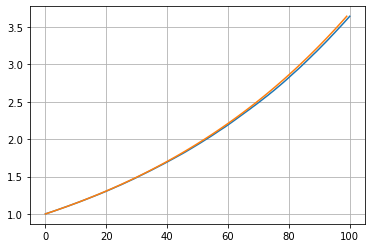

In [44]:
plt.plot(np.mean(S, axis=0))
plt.plot(mea)
plt.grid()

In [2]:
import numpy as np
from matplotlib import pyplot as plt

from scipy import stats as sps

# Geometric mean options

In [3]:
r = 0.3
sig = 1.0

S0 = 1.0
K = 1.0
T = 1.0

Nt = 10
tn = np.linspace(0, T, Nt + 1)

Nsim = 10000

In [4]:
def analit(r, sig, t, T, St, It, K):
    mu = It / T + (T-t) / T * np.log(St) + (r - sig ** 2 / 2) * (T-t)**2 / (2 * T)
    nu = sig * np.sqrt( (T-t)**3 / 3 ) / T
    d2 = (mu - np.log(K)) / nu
    d1 = d2 + nu
    
    I1 = np.exp(mu + nu ** 2 / 2) * sps.norm.cdf(d1)
    I2 = K * sps.norm.cdf(d2)
    
    return np.exp(-r * (T-t)) * (I1 - I2)

In [5]:
def BS(r, sig, t, T, St, K):
    d0 = np.log(St / K) + r * (T - t)
    d1 = d0 / (sig * np.sqrt(T - t + 1e-6)) + sig * np.sqrt(T - t) / 2
    d2 = d1 - sig * np.sqrt(T - t)
    
    I1 = St * sps.norm.cdf(d1)
    I2 = np.exp(-r*(T-t)) * K * sps.norm.cdf(d2)
    
    return I1 - I2

In [6]:
def gen_path_geo(r, sig, t, T, St, It, Nsim):
    nt = 100
    
    tau = (T - t) / nt
    
    X = np.log(St)
    I = It
    
    for i in range(nt):
        e = np.random.randn(Nsim)
        
        Xnew = X + tau * (r - sig ** 2 / 2) + sig * np.sqrt(tau) * e
        
        I = I + tau * (Xnew + X) / 2
        X = Xnew
        
    S = np.exp(X)
    G = np.exp(I / T)
    
    return S, G

In [7]:
Kn = np.linspace(0.2, 2.0)

In [8]:
S, G = gen_path_geo(r, sig, 0, T, S0, 0, Nsim)

In [9]:
payoff = np.maximum(G.reshape(1, -1) - Kn.reshape(-1, 1), 0.0)
Cmonte = np.exp(-r * T) * np.mean(payoff, axis=-1)

In [10]:
Canalit = analit(r, sig, 0, T, S0, 0, Kn)

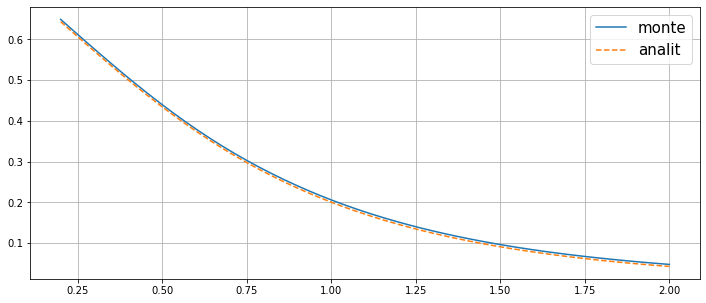

In [11]:
plt.figure(figsize=(12, 5))
plt.plot(Kn, Cmonte, label='monte')
plt.plot(Kn, Canalit, '--',label='analit')
plt.legend(fontsize=15)
plt.grid()

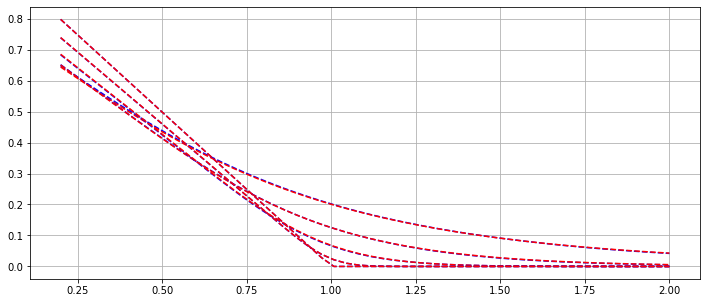

In [12]:
plt.figure(figsize=(12, 5))
for t in [0, 0.25, 0.5, 0.75, 0.99]:
    It = np.log(S0) * t
    Canalit = analit(r, sig, t, T, S0, It, Kn)
    
    S, G = gen_path_geo(r, sig, t, T, S0, It, Nsim)
    payoff = np.maximum(G.reshape(1, -1) - Kn.reshape(-1, 1), 0.0)
    Cmonte = np.exp(-r * (T - t)) * np.mean(payoff, axis=-1)
    
    plt.plot(Kn, Cmonte, '--b')
    plt.plot(Kn, Canalit, '--r')
plt.grid()

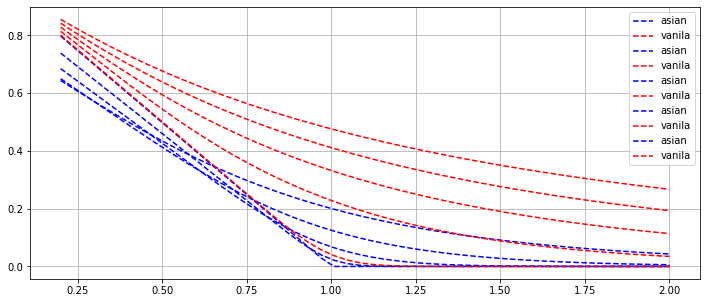

In [13]:
plt.figure(figsize=(12, 5))
for t in [0, 0.25, 0.5, 0.75, 0.99]:
    It = np.log(S0) * t
    CBS = BS(r, sig, t, T, S0, Kn)
    
    Canalit = analit(r, sig, t, T, S0, It, Kn)
    
    plt.plot(Kn, Canalit, '--b', label='asian')
    plt.plot(Kn, CBS, '--r', label='vanila')
plt.legend()
plt.grid()

# arithmetic mean option

In [14]:
def gen_path_arith(r, sig, t, T, St, It, Nsim):
    nt = 100
    
    tau = (T - t) / nt
    
    S = St
    I = It
    
    for i in range(nt):
        e = np.random.randn(Nsim)
        
        Snew = S * np.exp(tau * (r - sig ** 2 / 2) + sig * np.sqrt(tau) * e)
        I = I + tau * (Snew + S) / 2
        S = Snew
    A = I / T
    
    return S, A

In [15]:
def monte_moment_matching(r, sig, t, T, St, It, K, Nsim):
    S, A = gen_path_arith(r, sig, t, T, St, It, Nsim)
    
    tau = T - t
    m1 = St * (np.exp(r * tau) - 1) / r
    m2 = 2 * St ** 2 * (
        r * np.exp( (sig ** 2 + 2 * r) * tau) - (sig**2 + 2 * r) * np.exp(r * tau) + (sig ** 2 + r)
    ) / (r * (sig ** 2 + r) * (sig**2 + 2 * r))
    
    m2 = m2 + (It / T) ** 2 + 2 * m1 * (It / T)
    m1 = m1 + (It / T)
    var = m2 - m1 ** 2
    
    A = (A - np.mean(A)) / ( np.std(A) + 1e-10 ) * np.sqrt(var) + m1
    
    payoff = np.maximum(A.reshape(1, -1) - K, 0.0)
    C = np.exp(-r * (T-t)) * np.mean(payoff, axis=-1)
    return C

In [16]:
def monte(r, sig, t, T, St, It, K, Nsim):
    S, A = gen_path_arith(r, sig, t, T, St, It, Nsim)
    payoff = np.maximum(A - K, 0.0)
    C = np.exp(-r * (T-t)) * np.mean(payoff, axis=-1)
    return C

In [17]:
def moment_matching(r, sig, t, T, St, It, K):
    tau = T - t
    m1 = St * (np.exp(r * tau) - 1) / r
    m2 = 2 * St ** 2 * (
        r * np.exp( (sig ** 2 + 2 * r) * tau) - (sig**2 + 2 * r) * np.exp(r * tau) + (sig ** 2 + r)
    ) / (r * (sig ** 2 + r) * (sig**2 + 2 * r))
    
    nu = np.sqrt( np.log(m2 / m1 ** 2) )
    mu = np.log(m1) - nu ** 2 / 2
    
    K = K - It / T
    
    d2 = (mu - np.log(K)) / nu
    d1 = d2 + nu
    
    I1 = np.exp(mu + nu ** 2 / 2) * sps.norm.cdf(d1)
    I2 = K * sps.norm.cdf(d2)
    
    return np.exp(-r * tau) * (I1 - I2)

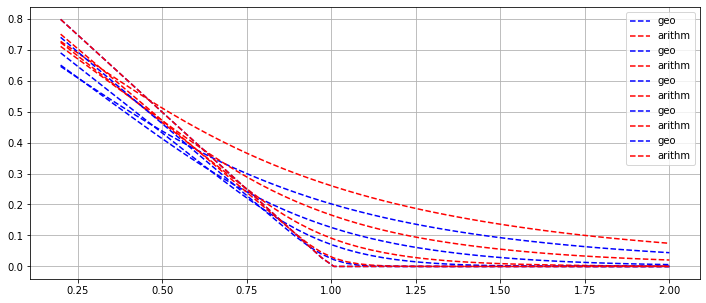

In [18]:
plt.figure(figsize=(12, 5))
for t in [0, 0.25, 0.5, 0.75, 0.99]:
    
    It = S0 * t
    S, A = gen_path_arith(r, sig, t, T, S0, It, Nsim)
    payoff = np.maximum(A.reshape(1, -1) - Kn.reshape(-1, 1), 0.0)
    Carithm = np.exp(-r * (T-t)) * np.mean(payoff, axis=-1)
    
    It = np.log(S0) * t
    S, G = gen_path_geo(r, sig, t, T, S0, It, Nsim)
    payoff = np.maximum(G.reshape(1, -1) - Kn.reshape(-1, 1), 0.0)
    Cgeo = np.exp(-r * (T-t)) * np.mean(payoff, axis=-1)
    
    plt.plot(Kn, Cgeo, '--b', label='geo')
    plt.plot(Kn, Carithm, '--r', label='arithm')
plt.legend()
plt.grid()

/tmp/ipykernel_7144/4192187846.py:2: RuntimeWarning: invalid value encountered in log
  d0 = np.log(St / K) + r * (T - t)


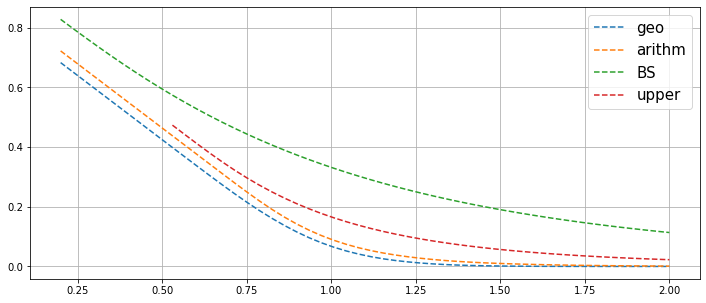

In [19]:
t = 0.5

CBS = BS(r, sig, t, T, S0, Kn)

It = S0 * t
S, A = gen_path_arith(r, sig, t, T, S0, It, Nsim)
payoff = np.maximum(A.reshape(1, -1) - Kn.reshape(-1, 1), 0.0)
Carithm = np.exp(-r * (T-t)) * np.mean(payoff, axis=-1)


upper_bound = (T - t) / T * BS(r, sig, t, T, S0, Kn * T / (T - t) - It / (T-t))


It = np.log(S0) * t
S, G = gen_path_geo(r, sig, t, T, S0, It, Nsim)
payoff = np.maximum(G.reshape(1, -1) - Kn.reshape(-1, 1), 0.0)
Cgeo = np.exp(-r * (T-t)) * np.mean(payoff, axis=-1)


plt.figure(figsize=(12, 5))
plt.plot(Kn, Cgeo, '--', label='geo')
plt.plot(Kn, Carithm, '--', label='arithm')
plt.plot(Kn, CBS, '--', label='BS')
plt.plot(Kn, upper_bound * np.ones_like(Kn), '--', label='upper')
plt.grid()
plt.legend(fontsize=15)

/tmp/ipykernel_7144/3320134478.py:13: RuntimeWarning: invalid value encountered in log
  d2 = (mu - np.log(K)) / nu


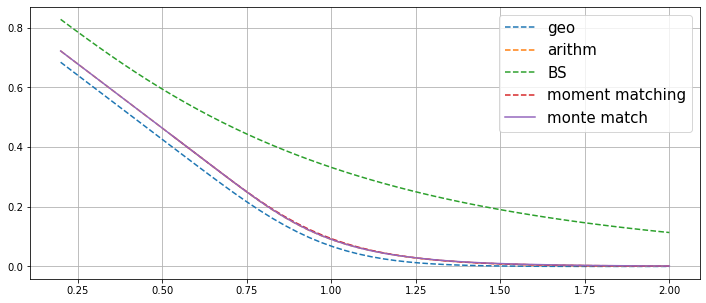

In [20]:
t = 0.5

CBS = BS(r, sig, t, T, S0, Kn)

It = S0 * t
S, A = gen_path_arith(r, sig, t, T, S0, It, Nsim)
payoff = np.maximum(A.reshape(1, -1) - Kn.reshape(-1, 1), 0.0)
Carithm = np.exp(-r * (T-t)) * np.mean(payoff, axis=-1)

Cmatch = monte_moment_matching(r, sig, t, T, S0, It, Kn.reshape(-1, 1), Nsim)

Cmoment = moment_matching(r, sig, t, T, S0, It, Kn)

It = np.log(S0) * t
S, G = gen_path_geo(r, sig, t, T, S0, It, Nsim)
payoff = np.maximum(G.reshape(1, -1) - Kn.reshape(-1, 1), 0.0)
Cgeo = np.exp(-r * (T-t)) * np.mean(payoff, axis=-1)





plt.figure(figsize=(12, 5))
plt.plot(Kn, Cgeo, '--', label='geo')
plt.plot(Kn, Carithm, '--', label='arithm')
plt.plot(Kn, CBS, '--', label='BS')
plt.plot(Kn, Cmoment, '--', label='moment matching')
plt.plot(Kn, Cmatch, label='monte match')
plt.grid()
plt.legend(fontsize=15)

In [21]:
np.linalg.norm(Cmatch - Carithm)

0.0026051153934889748

In [76]:
It = t * S0


nit = 30

Ns = 2 ** (np.arange(2, 15))

err1 = []
err2 = []

for N in Ns:
    
    c1 = []
    c2 = []
    
    for _ in range(nit):
        C_m = monte_moment_matching(r, sig, t, T, S0, It, K, N)
        C   = monte(r, sig, t, T, S0, It, K, N)
        c1.append(C_m)
        c2.append(C)
    err1.append(np.std(c1) ** 2)
    err2.append(np.std(c2) ** 2)

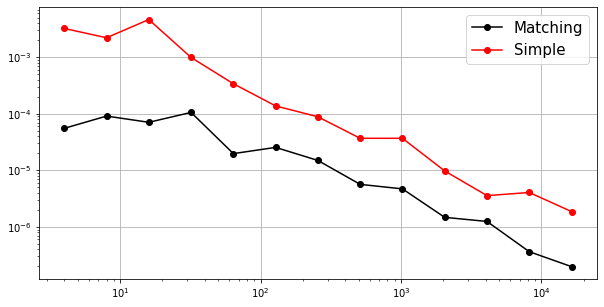

In [77]:
plt.figure(figsize=(10, 5))
plt.loglog(Ns, err1, '-ok', label='Matching')
plt.loglog(Ns, err2, '-or', label='Simple')
plt.legend(fontsize=15)
plt.grid()
None

# Control variate

In [72]:
np.cov([1,2,3], [1,2,3])

array([[1., 1.],
       [1., 1.]])

In [73]:
def gen_path_arith_geo(r, sig, t, T, S0, St, Nsim):
    nt = 100
    
    tau = (T - t) / nt
    
    X = np.log(St)
    S = St
    
    A = S0 * t
    G = np.log(S0) * t
    
    for i in range(nt):
        
        e = np.random.randn(Nsim)
        
        Xnew = X + tau * (r - sig ** 2 / 2) + sig * np.sqrt(tau) * e
        Snew = np.exp(Xnew)
        
        G += tau * (Xnew + X) / 2.0
        A += tau * (Snew + S) / 2.0
        
        X = Xnew
        S = Snew
        
    G = np.exp(G / T)
    A = A / T
    return S, A, G


def monte_control_variate(r, sig, t, T, S0, St, K, Nsim):
    if not isinstance(K, np.ndarray):
        K = np.asarray([K])
    S, A, G = gen_path_arith_geo(r, sig, t, T, S0, St, Nsim)
    
    payoff_A = np.exp(-r * (T-t)) * np.maximum(A.reshape(1, -1) - K.reshape(-1, 1), 0.0)
    payoff_G = np.exp(-r * (T-t)) * np.maximum(G.reshape(1, -1) - K.reshape(-1, 1), 0.0)
    
    
    C_G_analit = analit(r, sig, t, T, St, np.log(S0) * t, K)
    
    beta = -np.cov(payoff_A, payoff_G)[0, 1] / np.std(payoff_G) ** 2
    
    X = payoff_A + beta * (payoff_G - C_G_analit.reshape(-1, 1)) 
    
    C_A = np.mean(payoff_A, axis=-1)
    C_contrl = np.mean(X, axis=-1)
    
    return C_A, C_contrl

In [74]:
St = S0

nit = 30

Ns = 2 ** (np.arange(3, 15))

err1 = []
err2 = []

for N in Ns:
    
    c1 = []
    c2 = []
    
    for _ in range(nit):
        C1, C2 = monte_control_variate(r, sig, t, T, S0, St, K, N)
        c1.append(C1)
        c2.append(C2)
    err1.append(np.std(c1) ** 2)
    err2.append(np.std(c2) ** 2)

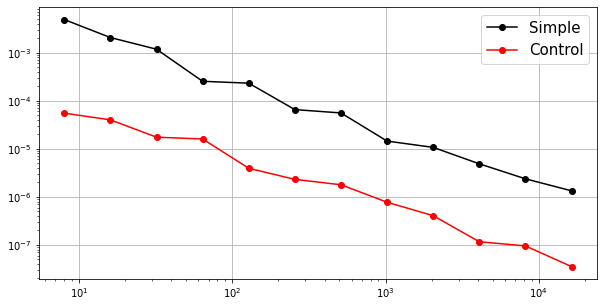

In [75]:
plt.figure(figsize=(10, 5))
plt.loglog(Ns, err1, '-ok', label='Simple')
plt.loglog(Ns, err2, '-or', label='Control')
plt.legend(fontsize=15)
plt.grid()
None